<a href="https://colab.research.google.com/github/CarlosRochaCx/MNA/blob/IAyAA/MNA_IAyAA_Actividad_semana_3_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

**Tecnológico de Monterrey**

Prof Luis Eduardo Falcón Morales

Actividad de Semana 3 - Septiembre 2024

**Rotación de Personal - IBM**

#### **Nombre y matrícula:** Carlos Alberto Rocha Chávez - A01796914

#### **La siguiente actividad se basa en los datos del archivo "WA_Fn-UseC_-HR-Employee-Attrition.csv" que se encuentra en la siguiente liga de Kaggle, llamada "IBM HR Analytics Employee Attrition & Performance":**

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


In [116]:
# Incluye aquí todas las librerías que consideres necesarias:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# **Ejercicio 1:**

#### **Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem).**

++++++++ Inicia la sección de agregar texto: ++++++++++++


El problema de rotación de personal se entiende como la salida constante de empleados de una organización, ya sea por despidos, renuncias voluntarias o por otras razones. Esta rotación genera diversos problemas para las empresas, ya que implica costos relacionados a los procesos de reclutamiento y capacitación de nuevos empleados, además de que impacta de forma indirecta a la productividad, a la retención de conocimiento y a la continuidad de las actividades de la empresa.

Es importante que las organizaciones lleven un análisis sobre sus niveles de rotación para poder detectar la causa y así poder desarrollar estrategias que ayuden a mejorar la retención de empleados y mejorar la estabilidad laboral.


++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 2:**

#### **Carga los datos del archivo de la página de Kaggle indicada como un DataFrame de Pandas, llamado "df" y utilicemos el método “describe” con el argumento include= “all”, para obtener una primera descripción general de cada variable.**

In [117]:
# ++++++++++++++ Inicia sección de agregar código ++++++++++++++++++++

file_path = "WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "pavansubhasht/ibm-hr-analytics-attrition-dataset", file_path)

# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++


print("Tamaño del DataFrame:", df.shape)
df.describe(include = 'all').T


<ipython-input-117-0396310159ab>:4: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "pavansubhasht/ibm-hr-analytics-attrition-dataset", file_path)


Tamaño del DataFrame: (1470, 35)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


# **Ejercicio 3:**

#### **Indica cuál es la diferencia entre utilizar o no el argumento include=”all” del método "describe" en el ejercicio anterior.**

++++++++ Inicia la sección de agregar texto: ++++++++++++


El argumento include="all" del método "describe" permite generar un resumen estadístico de todas las columnas del DataFrame, sin importar el tipo de dato que contengan. La diferencia de no utilizar este argumento, es que al no emplearlo, el método "describe" solamente brindará el resumen estadístico sobre las columnas con datos numéricos.

++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 4:**

#### **Con base a la información desplegada por la instrucción anterior, hemos decidido cancelar los siguientes factores de nuestro problema: Over18, EmployeeCount, StandardHours, EmployeeNumber. Explica cuál es la justificación que nos permite cancelar cada uno de estos factores:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

**a)   Over18**: Este factor indica si los empleados son mayores de edad. Al analizar el resumen estadístico podemos ver que todos los valores de este factor son "Y", indicando que todos los empleados son mayores de edad. Al no presentar ninguna variabilidad, y al no ser relevante para la rotación de personal, es mejor removerlo de nuestros datos al no ser relevante para el análisis.

**b)	EmployeeCount**: Este factor tiene un valor constante de "1", utilizado simplemente para sumar y poder llevar un conteo de la cantidad de empleados en la base de datos. Al no ser un factor relevante para la rotación de personal es mejor eliminarlo del análisis.

**c)	StandardHours**: Este factor mide la cantidad promedio de horas que labora cada empleado. Al analizar el resumen estadístico vemos que arroja un valor constante de "80" horas para todos los empleados. Al no presentar ninguna variabilidad, es mejor eliminar este factor del análisis, ya que no representa relevancia con el objetivo del análisis.

**d)	EmployeeNumber**: Este factor arroja el número de empleado. Cada empleado tiene un número de identificación único. Debido a que este factor no brinda ninguna característica relevante para el análisis, es mejor eliminarlo de nuestros datos.

++++++++ Termina la sección de agregar texto. +++++++++++




In [118]:
# Eliminamos los factores indicados:

df = df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

print("Tamaño del nuevo DataFrame:", df.shape)

Tamaño del nuevo DataFrame: (1470, 31)


# **Ejercicio 5:**

#### **Realiza una partición de los datos en Entrenamiento, Validación y Prueba, del 70%, 15% y 15%, respectivamente. Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para los datos de entrada y de salida, respectivamente. Asegúrate que dicha partición conserve la estratificación de las clases de la variable “Attrition”. Despliega además la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y Prueba.**

#### **NOTA: Utiliza semillas en cada función de partición, para permitir la repetibilidad de tu modelo y poder evaluarlo de mejor majera.**

In [119]:
# ++++++++++++++ Inicia sección de agregar código +++++++++++++++++++++

X = df.drop('Attrition', axis=1)
y = df['Attrition']

Xtrain, Xtemp, ytrain, ytemp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=1)

Xval, Xtest, yval, ytest = train_test_split(Xtemp, ytemp, test_size=0.50, stratify=ytemp, random_state=1)

print('Dimensión de los conjuntos:')
print(f'Dimensión de Xtrain: {Xtrain.shape}, ytrain: {ytrain.shape}')
print(f'Dimensión de Xval:   {Xval.shape}, yval:   {yval.shape}')
print(f'Dimensión de Xtest:  {Xtest.shape}, ytest:  {ytest.shape}')

# ++++++++++++++ Termina sección de agregar código +++++++++++++++++++++

Dimensión de los conjuntos:
Dimensión de Xtrain: (1029, 30), ytrain: (1029,)
Dimensión de Xval:   (220, 30), yval:   (220,)
Dimensión de Xtest:  (221, 30), ytest:  (221,)


# **Ejercicio 6:**


#### **Aplica la transformación LabelEncoder() de sklearn a la variable de salida “Attrition”. Las nuevas variables deberán llamarse ahora: ytrainT, yvalT, ytestT. Encuentra la proporción de datos en cada nivel de esta variable y con base a dicha información indica si podemos considerar que tenemos un problema de datos desbalanceados.**

#### NOTA: Aplica esta transformación evitando el filtrado de información (data leakage).

In [120]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++

le = LabelEncoder()
le.fit(ytrain)

ytrainT = le.transform(ytrain)
yvalT   = le.transform(yval)
ytestT  = le.transform(ytest)

ytrainT_series = pd.Series(ytrainT)
yvalT_series = pd.Series(yvalT)
ytestT_series = pd.Series(ytestT)

print("Proporción de datos en ytrainT:")
print(ytrainT_series.value_counts(normalize=True))

print("\nProporción de datos en yvalT:")
print(yvalT_series.value_counts(normalize=True))

print("\nProporción de datos en ytestT:")
print(ytestT_series.value_counts(normalize=True))

ytrainT = pd.DataFrame(ytrainT, columns=['Attrition'])

# +++++++++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++


print('\nPorcentaje de datos en cada clase de entrenamiento - Attrition:', ytrainT['Attrition'].value_counts() / ytrainT.shape[0])


Proporción de datos en ytrainT:
0    0.838678
1    0.161322
Name: proportion, dtype: float64

Proporción de datos en yvalT:
0    0.840909
1    0.159091
Name: proportion, dtype: float64

Proporción de datos en ytestT:
0    0.837104
1    0.162896
Name: proportion, dtype: float64

Porcentaje de datos en cada clase de entrenamiento - Attrition: Attrition
0    0.838678
1    0.161322
Name: count, dtype: float64


Con estos resultados podemos confirmar que los datos se encuentran desbalanceados en relación con la variable "Attrition".

# **Ejercicio 7:**


#### **Incluye a continuación el análisis gáfico y describtivo que consideres adecuado. Con base a estos gráficos ¿qué tipo de transformaciones sugieres llevar a cabo en dichas variables?**

In [121]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++
# Incluye en esta sección todas las celdas que consideres conveniente.


num_cols = ["NumCompaniesWorked","TrainingTimesLastYear", "Age",  "DailyRate",  "DistanceFromHome",  "HourlyRate",
            "MonthlyIncome",  "MonthlyRate", "PercentSalaryHike",  "TotalWorkingYears",  "YearsAtCompany",  "YearsInCurrentRole",
            "YearsSinceLastPromotion",  "YearsWithCurrManager" ]

ord_cols = ["Education" ,  "EnvironmentSatisfaction" ,  "JobInvolvement" ,  "JobLevel" ,  "JobSatisfaction" ,  "PerformanceRating" ,
            "RelationshipSatisfaction" ,  "StockOptionLevel",  "WorkLifeBalance" ]

bin_cols = ["Gender",  "OverTime"]

cat_cols = ["BusinessTravel",  "Department" ,  "EducationField",  "JobRole",  "MaritalStatus"]

df_num = df[num_cols]
df_ord = df[ord_cols]
df_bin = df[bin_cols]
df_cat = df[cat_cols]

df_num.describe().T

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++



,count,mean,std,min,25%,50%,75%,max
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.00,9.0
TrainingTimesLastYear,1470.0,2.799320,1.289271,0.0,2.0,3.0,3.00,6.0
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.00,25.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.00,40.0


In [122]:
df_ord.describe().T

,count,mean,std,min,25%,50%,75%,max
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.0,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
PerformanceRating,1470.0,3.153741,0.360824,3.0,3.0,3.0,3.0,4.0
RelationshipSatisfaction,1470.0,2.712245,1.081209,1.0,2.0,3.0,4.0,4.0
StockOptionLevel,1470.0,0.793878,0.852077,0.0,0.0,1.0,1.0,3.0
WorkLifeBalance,1470.0,2.761224,0.706476,1.0,2.0,3.0,3.0,4.0


In [123]:
df_bin.describe().T

,count,unique,top,freq
Gender,1470,2,Male,882
OverTime,1470,2,No,1054


In [124]:
df_cat.describe().T

,count,unique,top,freq
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673


Al estudiar el análisis descriptivo de nuestros distintos tipos de datos podemos llegar a varias conclusiones. Inicialmente podemos notar que ninguno de nuestos factores tiene un valor faltante, por lo que no será necesario hacer alguna imputación. Por otra parte, podemos identificar que al poseer valores binarios y categóricos, sería posible aplicar un tipo de transformación tipo one-hot encoder si lo deseamos para un mejor análisis.

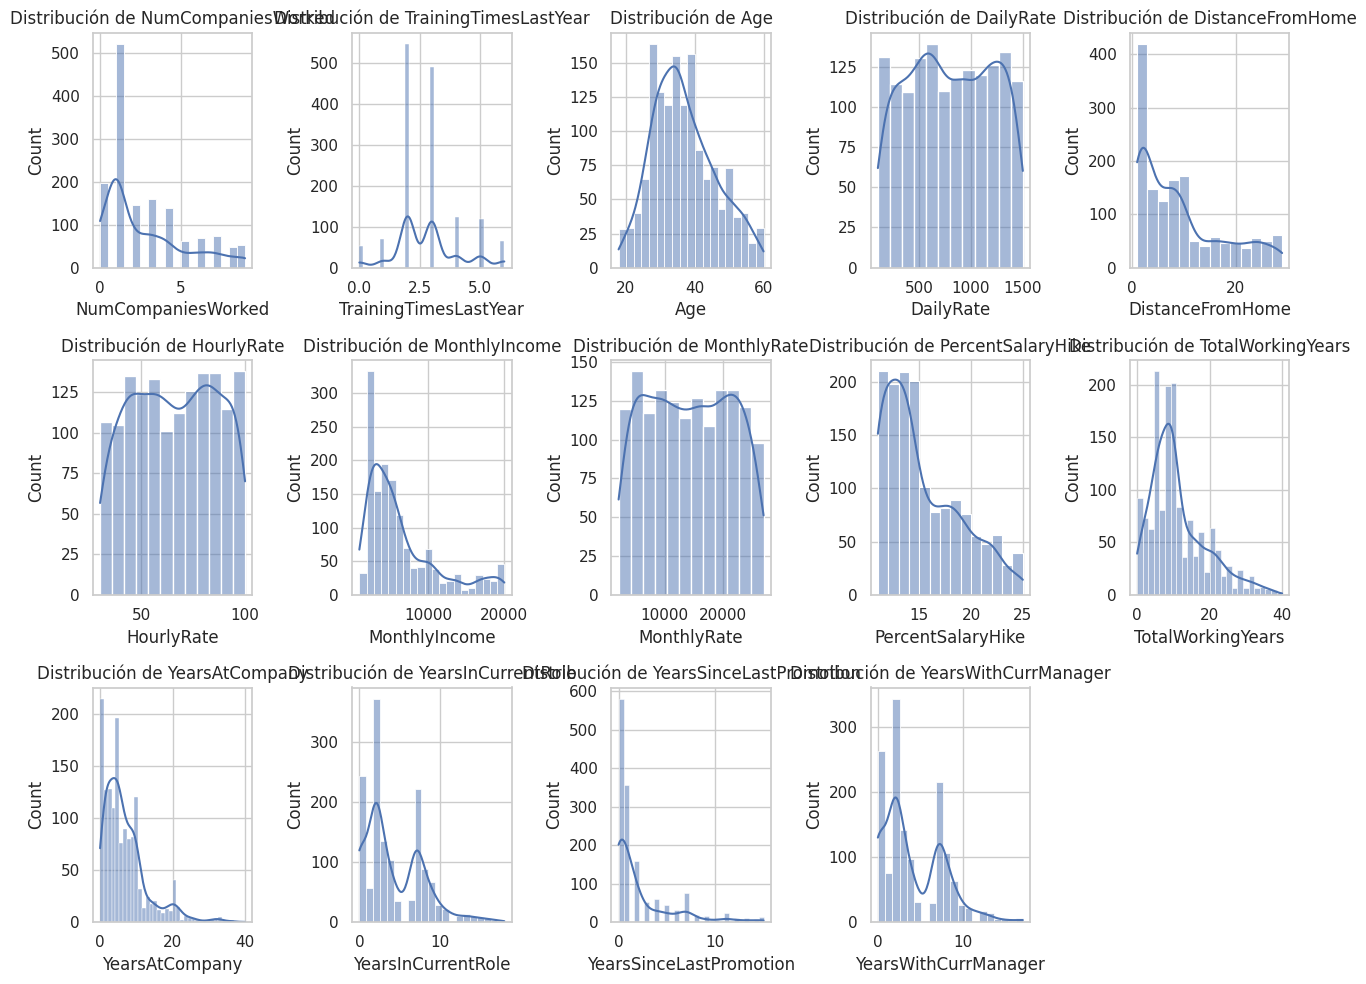

In [137]:
plt.figure(figsize=(13, 10))
for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 5, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()

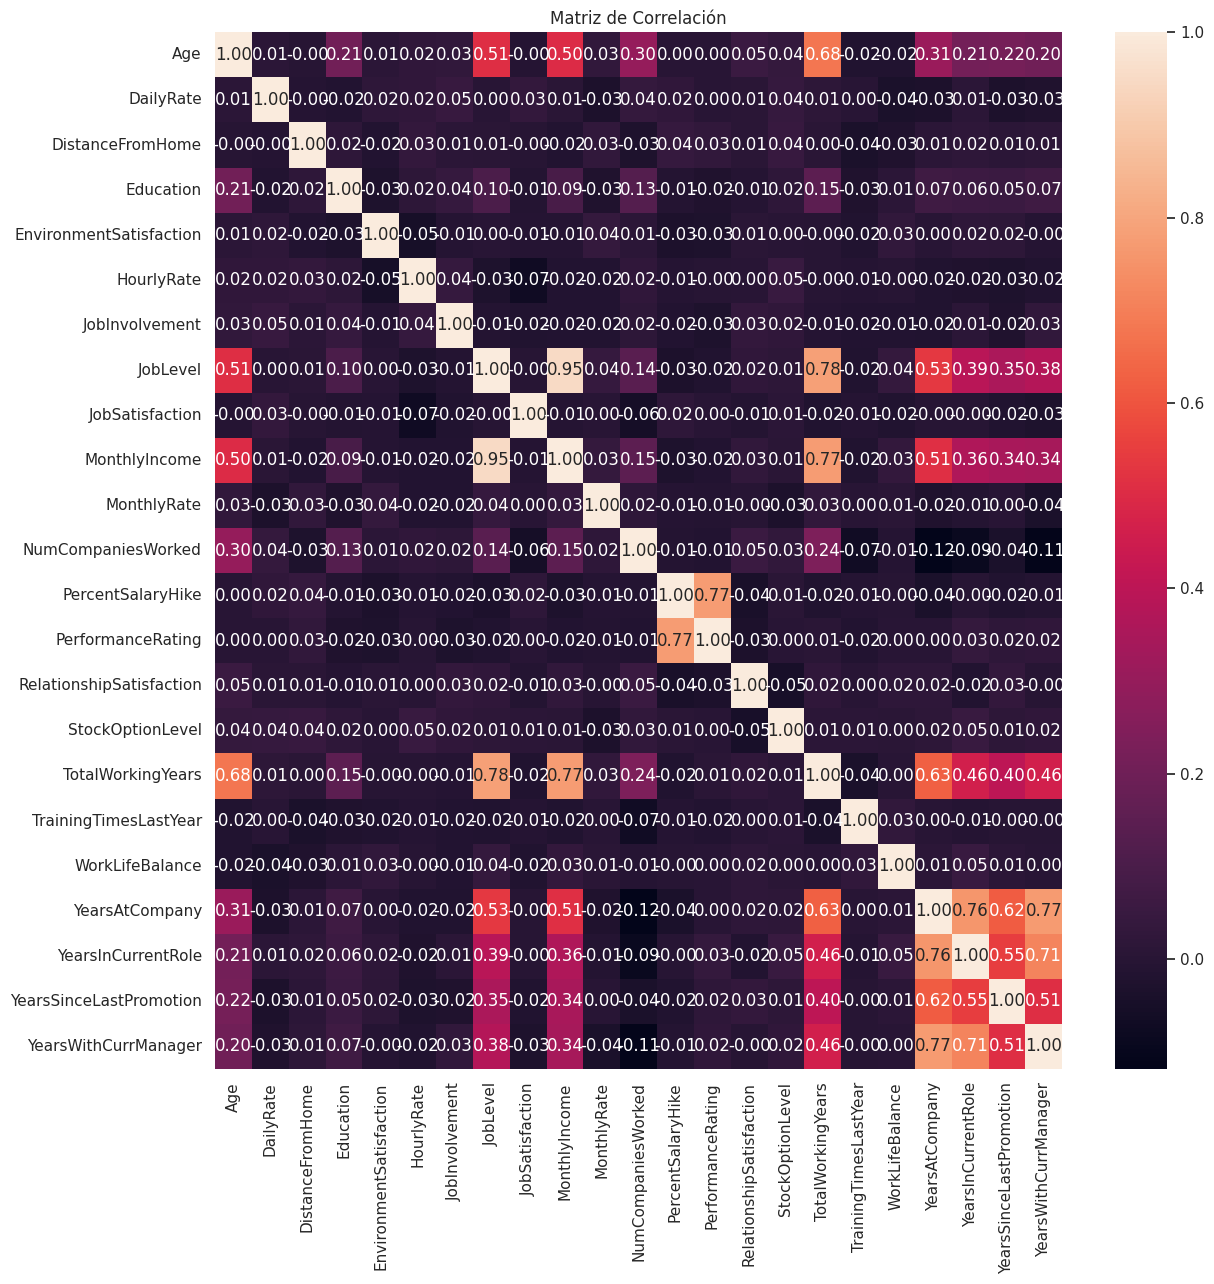

In [126]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(13, 13))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

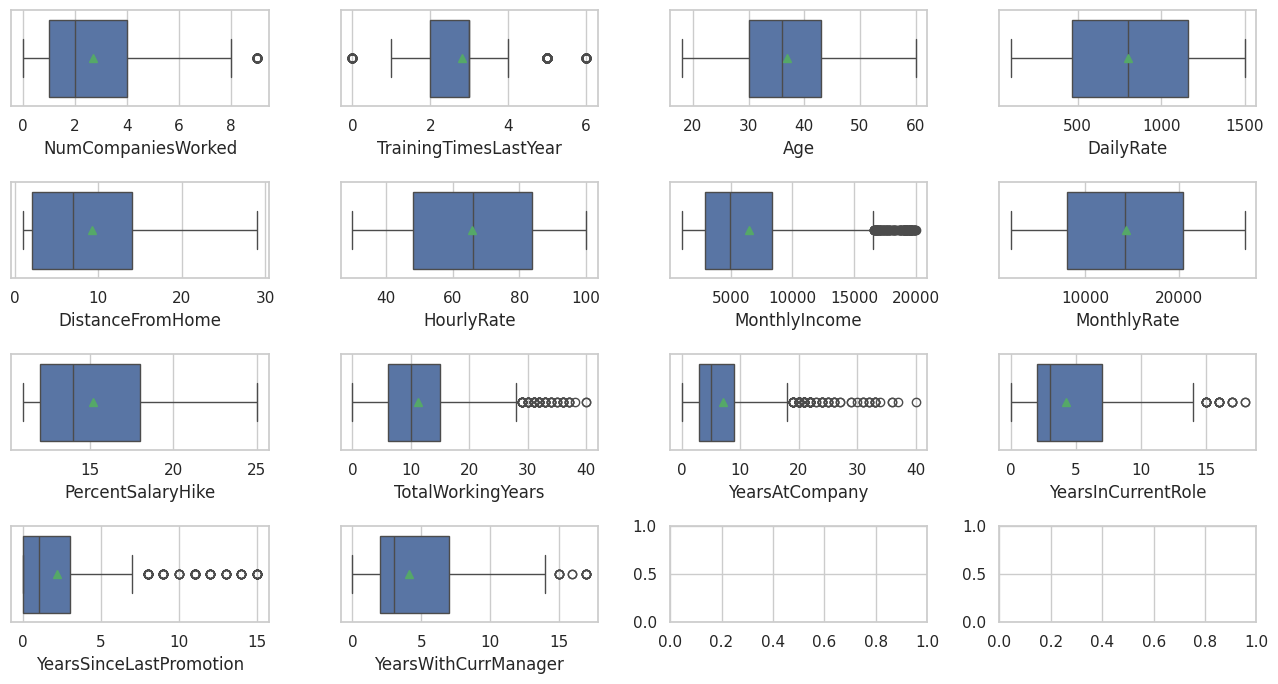

In [136]:
fig, axes = plt.subplots(4, 4, figsize=(13, 7))
axes = axes.ravel()
for col, ax in zip(num_cols, axes):
    sns.boxplot(x=df[col], ax=ax, showmeans=True)
    ax.set(xlabel=f'{col}')
plt.tight_layout()

Al graficar los datos, identificamos que las distribuciones de los factores numéricos no son normales, por lo que se recomendaría aplicar alguna transformación para normalizar los histogramas. Así mismo, logramos ver que los rangos de valores de los gráficos son muy distintos, por lo que se podría sugerir escalar los valores de las variables.

Finalmente, en los boxplots podemos identificar que algunas variables cuentan con outliers, por lo que sería oportuno hacer un análisis sobre ellas y hacer las transformaciones necesarias de imputaciones para normalizar los factores.

# **Ejercicio 8:**

#### **Utiliza las clases Pipeline y ColumnTransformer de Sklearn para definir las transformaciones que deberán aplicarse a cada variable de acuerdo a su tipo.**



In [128]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


# NUMÉRICAS:

numericas_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

#Usamos SimpleImputer para rellenar cualquier valor perdido. Para valores
#númericos se usa la media o mediana, en este caso utilizaremos la moda.

#Usamos StandardScaler, principalmente porque nuestros datos tienen outliers
#y están centrados de forma desigual, esto ayuda a mejorar la estabilidad numérica

numericas_pipeline_nombres = num_cols

# ORDINALES:

catOrd_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder())
])

catOrd_pipeline_nombres = ord_cols

# BINARIAS:

catBin_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder())
])

#Usamos OrdinalEncoder ya que funciona para variables binarias y no genera
#columnas adicionales, siendo la opción más simple y eficiente.

catBin_pipeline_nombres = bin_cols

# NOMINALES:

catNom_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

catNom_pipeline_nombres = cat_cols

columnasTransformer = ColumnTransformer(transformers=[
        ('numpipe', numericas_pipeline, numericas_pipeline_nombres),
        ('ordpipe', catOrd_pipeline, catOrd_pipeline_nombres),
        ('binpipe', catBin_pipeline, catBin_pipeline_nombres),
        ('catpipe', catNom_pipeline, catNom_pipeline_nombres)
    ],
    remainder='passthrough')

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

# **Ejercicio 9:**

#### **Reagrupa los conjuntos de entrenamiento y validación en un solo DataFrame.**

#### **A estos nuevos DataFrame llamarlos Xtv y ytv.**

In [129]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


Xtv = pd.concat([Xtrain, Xval], axis=0)
ytv = pd.concat([ytrain, yval], axis=0)


# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

print(Xtv.shape)
print(ytv.shape)

(1249, 30)
(1249,)


# **Ejercicio 10:**

#### **Busca los mejores hiperparámetros.**

>> LR 0.874 (0.014)
>> LASSO 0.879 (0.015)
>> RIDGE 0.879 (0.014)
>> EN 0.880 (0.014)
>> kNN 0.839 (0.012)


<ipython-input-130-7c713f362c9c>:74: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(resultados, labels=nombres, showmeans=True)   # gráficos de caja para una comparación visual de los resultados.


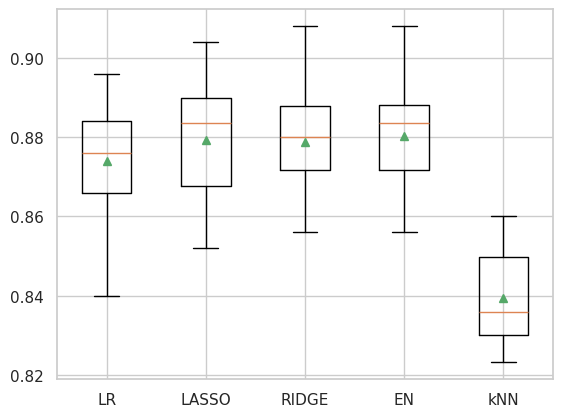

In [130]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


def mis_modelos():
  modelos, nombres = list(), list()

  # LR - Regresión Logística sin regularización:
  modelos.append(LogisticRegression(penalty=None,  # Este valor de "penalty" no se debe de cambiar, ya que define el modelo sin regularización.
                                    solver='lbfgs',
                                    max_iter=1000,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('LR')


  # Lasso - Regresión Logística con regularización L1:
  modelos.append(LogisticRegression(penalty='l1',
                                    solver='liblinear',
                                    max_iter=1000,
                                    C=1.0,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('LASSO')


  # Ridge - Regresión Logística con regularización L2:
  modelos.append(LogisticRegression(penalty='l2',
                                    solver='lbfgs',
                                    max_iter=1000,
                                    C=1.0,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('RIDGE')


  # Elastic_Net - - Regresión Logística con regularización L1 y L2:
  modelos.append(LogisticRegression(penalty='elasticnet',
                                    solver='saga',
                                    max_iter=1000,
                                    C=1.0,
                                    l1_ratio=0.5,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('EN')



  # kNN - k-Vecinos más cercanos:
  modelos.append(KNeighborsClassifier(n_neighbors=5,
                                      metric='minkowski',
                                      p=2)) # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
  nombres.append('kNN')

  return modelos, nombres

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++



# Entrenamos los modelos:

modelos, nombres = mis_modelos()  # accesando los modelos.
resultados = list()    # para guardar los resultados en esta lista.

# Iterando y entrenando sobre cada modelo:
for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])   # Transformaciones y modelo en un Pipeline.

  cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)     # Aplicando una de las variantes de Validación Cruzada.

  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv1)   # entrenando y generando los resultados.

  resultados.append(scores)    # guardando los resultados en la lista.
  print('>> %s %.3f (%.3f)' % (nombres[i], np.nanmean(scores), np.nanstd(scores)))  # desplegando los promedios de cada modelo.


plt.boxplot(resultados, labels=nombres, showmeans=True)   # gráficos de caja para una comparación visual de los resultados.
plt.show()

# **Ejercicio 11:**

#### **Utilizando el mejor modelo y los datos Xtv, ytv, realiza una búsqueda de malla para encontrar los mejores hiperparámetros. Verifica que el modelo no esté subentrenado o sobreentrenado.**



In [131]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

mejor_modelo = (LogisticRegression(penalty='elasticnet',
                                    solver='saga',
                                    max_iter=1000,
                                    C=1.0,
                                    l1_ratio=0.5,
                                    random_state=1))

param_grid = {
    'model__C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'model__max_iter': [200, 500, 1000],
    'model__l1_ratio': [0.2, 0.5, 0.8]
}
pipeline = Pipeline(steps=[('ct', columnasTransformer), ('model', mejor_modelo)])

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           scoring='accuracy', cv=5, return_train_score=True)

grid_result = grid_search.fit(Xtv, np.ravel(ytv))

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++



print("Mejor modelo: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))
print('Promedios Train mean(std): %.4f(%.4f)' % (np.nanmean(grid_result.cv_results_['mean_train_score']),
                                                 np.nanmean(grid_result.cv_results_['std_train_score'])))
print('Promedios Val mean(std): %.4f(%.4f)' % (grid_result.cv_results_['mean_test_score'].mean(),
                                               grid_result.cv_results_['std_test_score'].mean()))


Mejor modelo: 0.876710 usando {'model__C': 1.0, 'model__l1_ratio': 0.8, 'model__max_iter': 200}
Promedios Train mean(std): 0.8810(0.0058)
Promedios Val mean(std): 0.8644(0.0119)


# **Ejercicio 12:**

#### **Con los mejores valores de hiperparámetros del mejor modelo encontrado, obtener:**

*   #### **a) Matriz de Confusión.**
*   #### **b) Análisis de Imprtancia de Factores.**
*   #### **c) Reporte de métricas.**

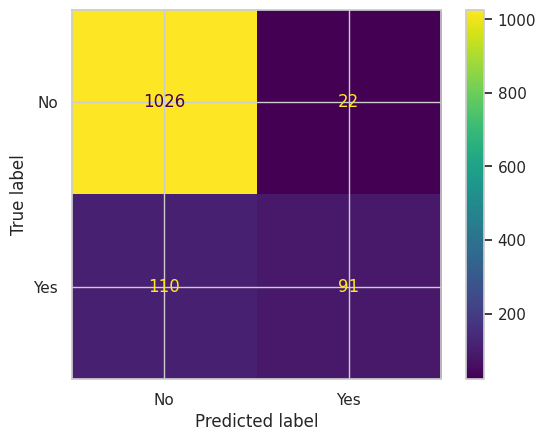

In [132]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++
# Incluye todas las celdas que consideres adecuado para responder
# estos tres incisos del ejercicio.

mejor_modelo = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
Xx = columnasTransformer.fit_transform(Xtv)
mejor_result = mejor_modelo.fit(Xx, np.ravel(ytv))
mejor_result.score(columnasTransformer.transform(Xtest), np.ravel(ytest))
ConfusionMatrixDisplay.from_estimator(mejor_result, Xx, np.ravel(ytv))
plt.show()

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

In [133]:
coef = mejor_result.coef_.flatten()
importancia_factors = pd.DataFrame({
    'Característica': columnasTransformer.get_feature_names_out(),
    'Coeficiente': coef,
    'Importancia': abs(coef)
}).sort_values(by='Importancia', ascending=False)

print("Importancia de Factores:")
print(importancia_factors)

Importancia de Factores:
                                Característica  Coeficiente  Importancia
24                           binpipe__OverTime     1.789718     1.789718
25   catpipe__BusinessTravel_Travel_Frequently     1.457083     1.457083
43               catpipe__MaritalStatus_Single     1.058561     1.058561
35      catpipe__JobRole_Laboratory Technician     0.944763     0.944763
26       catpipe__BusinessTravel_Travel_Rarely     0.671603     0.671603
27  catpipe__Department_Research & Development    -0.604563     0.604563
16                     ordpipe__JobInvolvement    -0.590441     0.590441
10                     numpipe__YearsAtCompany     0.550538     0.550538
12            numpipe__YearsSinceLastPromotion     0.537159     0.537159
29       catpipe__EducationField_Life Sciences    -0.502307     0.502307
33    catpipe__EducationField_Technical Degree     0.498997     0.498997
38          catpipe__JobRole_Research Director    -0.498280     0.498280
41       catpipe__JobRole_

In [134]:
y_pred = mejor_result.predict(Xx)

print("Reporte de Métricas:")
reporte = classification_report(np.ravel(ytv), y_pred, target_names=['0', '1'])
print(reporte)

Reporte de Métricas:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1048
           1       0.81      0.45      0.58       201

    accuracy                           0.89      1249
   macro avg       0.85      0.72      0.76      1249
weighted avg       0.89      0.89      0.88      1249



# **Ejercicio 13**

 **Obtener el desempeño final del modelo (accuracy) con el conjunto de prueba (test).**

In [135]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++

best_model = grid_result.best_estimator_
y_pred_test = best_model.predict(Xtest)
accuracy = accuracy_score(ytest, y_pred_test)

print("Accuracy:", accuracy)

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

Accuracy: 0.8914027149321267


# **Ejercicio 14**

#### **Incluye tus conclusiones finales de la actividad.**

#### +++++++++ Inicia sección para incluir tus conclusiones ++++++++++++++++++++++++

La rotación de personal es un problema que puede llegar a impactar a todo tipo de empresa, por lo que el desarrollar un modelo que permita identificar las principales razones que causan dicha rotación sería de gran beneficio, permitiendo poder predecir que factores influyen en mayor manera y tomar las acciones necesarias para reducir la rotaciión.

Por otra parte, al realizar esta actividad se logró poner en práctica distintas etapas del modelo CRISP-DM, iniciando por el entendimiento del negocio al comprender el problema de la rotación de datos. Posteriormente se analizaron los datos disponibles, identificando los tipos de datos que poseemos, eliminando aquellos que no son de provecho para el fin del modelo y desarrollando gráficas de visualización para su análisis y posterior transformación.

Una vez hecho esto, procedimos con evaluar distintos tipos de modelos, hasta elegir el que mejor resultados brindaba con nuestros datos. Finalmente se aplicaron diferentes métodos para evaluar la efectividad y desempeño del modelo creado. En este caso, el modelo creado tuvo un "accuracy" de .89, por lo que se puede concluir que tiene un buen desempeño en términos de exactitud.

#### +++++++++ Termina sección para incluir tus conclusiones ++++++++++++++++++++++++

# >> **Fin de la Actividad de la Semana 3** <<